#Load data

In [30]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import json

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
training = pd.read_csv('/content/drive/MyDrive/dataset/processed_training_data.csv')
validation = pd.read_csv('/content/drive/MyDrive/dataset/processed_validation_data.csv')
testing = pd.read_csv('/content/drive/MyDrive/dataset/processed_testing_data.csv')

In [33]:
training.head(5)

,Unnamed: 0,label,text
0,0,0,this be an absolutely terrible movie do not be...
1,1,0,pron have be know to fall asleep during film b...
2,2,0,person photograph org in a superb fashion and ...
3,3,1,this be the kind of film for a snowy date time...
4,4,1,as other have mention all the woman that go nu...


#Vectorization

In [34]:
count_vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,2))
count_vectorizer.fit(training['text'])
vectorized = count_vectorizer.transform(training['text'])
print(dict(list(count_vectorizer.vocabulary_.items())[0:8]))
print('The transformed data matrix dimensions:', vectorized.shape)

{'absolutely': 8291, 'terrible': 1137108, 'movie': 719798, 'lure': 662867, 'person': 813247, 'great': 482769, 'actor': 18086, 'simply': 1034229}
The transformed data matrix dimensions: (30000, 1279860)


In [35]:
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(vectorized)
transformed_tfidf = tfidf_transformer.transform(vectorized)
print(transformed_tfidf.shape)
print(transformed_tfidf[2])


(30000, 1279860)
  (0, 1276252)	0.12744135201161827
  (0, 1275965)	0.04746691098944858
  (0, 1251329)	0.10408102932206548
  (0, 1251092)	0.06380597224781188
  (0, 1246086)	0.12744135201161827
  (0, 1246071)	0.07117770774248602
  (0, 1220044)	0.1225738118688427
  (0, 1219426)	0.04422434335648769
  (0, 1185186)	0.12744135201161827
  (0, 1184992)	0.04817839949422897
  (0, 1164539)	0.12744135201161827
  (0, 1164025)	0.051529252645216794
  (0, 1134139)	0.08928935252811744
  (0, 1133577)	0.03647313765762613
  (0, 1110255)	0.12744135201161827
  (0, 1110138)	0.05681306038752741
  (0, 1092384)	0.12744135201161827
  (0, 1092302)	0.055849589195996883
  (0, 1018746)	0.07809100556846
  (0, 1018663)	0.06877875266100374
  (0, 978038)	0.12744135201161827
  (0, 977927)	0.06769650396744183
  (0, 951777)	0.11912023717643695
  (0, 951702)	0.06693467313665075
  (0, 946927)	0.10325278155225119
  :	:
  (0, 352265)	0.10710664020607569
  (0, 350132)	0.11912023717643695
  (0, 350126)	0.09533864911921466
  (0, 3

In [36]:
def get_metrics(predicted,true):
    metrics = dict()
    metrics['accuracy'] = round(accuracy_score(predicted, true), 5)
    metrics['precision'] = round(precision_score(predicted, true, average = 'weighted'), 5)
    metrics['recall'] = round(recall_score(predicted, true, average = 'weighted'), 5)
    metrics['f1'] = round(f1_score(predicted, true, average = 'weighted'), 5)
    
    return metrics

#SVM(0.886)

In [71]:
pipeline_SVM = Pipeline([
        ('count_vectorizer', CountVectorizer()),  
        ('tfidf_transformer', TfidfTransformer()),  
        ('classifier', LinearSVC())
    ])

In [72]:
pipeline_SVM.fit(training['text'], training['label'])
prediction_SVM = pipeline_SVM.predict(validation['text'])


In [73]:
print(classification_report(validation['label'], prediction_SVM))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      5025
           1       0.88      0.89      0.89      4975

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [74]:
metrics_SVM = get_metrics(prediction_SVM, validation['label'])
print(metrics_SVM)

{'accuracy': 0.886, 'precision': 0.886, 'recall': 0.886, 'f1': 0.886}


In [41]:
with open("SVM_results.json", "w") as output:
    json.dump(metrics_SVM, output)

#LogisticRegression(0.8864)

In [42]:
from sklearn.linear_model import LogisticRegression

pipeline_LR = Pipeline([
        ('count_vectorizer', CountVectorizer()),  
        ('tfidf_transformer', TfidfTransformer()),  
        ('classifier', LogisticRegression())
    ])

pipeline_LR.fit(training['text'], training['label'])
prediction_LR = pipeline_LR.predict(validation['text'])

print(classification_report(validation['label'], prediction_LR))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      5025
           1       0.88      0.89      0.89      4975

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [43]:
metrics_LR = get_metrics(prediction_LR, validation['label'])
print(metrics_LR)

{'accuracy': 0.8864, 'precision': 0.88641, 'recall': 0.8864, 'f1': 0.8864}


In [84]:
models.append('LR')
acc.append(metrics_LR['accuracy'])

#Naive Bayes Classifier(X)

In [52]:
from sklearn.naive_bayes import GaussianNB

pipeline_NB = Pipeline([
        ('count_vectorizer', CountVectorizer()),  
        ('tfidf_transformer', TfidfTransformer()),  
        ('classifier', GaussianNB())
    ])

pipeline_NB.fit(training['text'], training['label'])
prediction_NB = pipeline_NB.predict(validation['text'])

print(classification_report(validation['label'], prediction_NB))

TypeError: ignored

In [ ]:
metrics_NB = get_metrics(prediction_NB, validation['label'])
print(metrics_NB)

#Random Forest(0.8582)

In [68]:
from sklearn.ensemble import RandomForestClassifier

pipeline_RF = Pipeline([
        ('count_vectorizer', CountVectorizer()),  
        ('tfidf_transformer', TfidfTransformer()),  
        ('classifier', RandomForestClassifier(n_estimators = 1000, random_state = 42))
    ])

pipeline_RF.fit(training['text'], training['label'])
prediction_RF = pipeline_RF.predict(validation['text'])

print(classification_report(validation['label'], prediction_RF))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      5025
           1       0.85      0.86      0.86      4975

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [69]:
metrics_RF = get_metrics(prediction_RF, validation['label'])
print(metrics_RF)

{'accuracy': 0.8582, 'precision': 0.85825, 'recall': 0.8582, 'f1': 0.8582}


#K-Means(0.4808)

In [66]:
from sklearn.cluster import KMeans

pipeline_KM = Pipeline([
        ('count_vectorizer', CountVectorizer()),  
        ('tfidf_transformer', TfidfTransformer()),  
        ('classifier', KMeans(n_clusters=2, init = 'random', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0))
    ])

pipeline_KM.fit(training['text'], training['label'])
prediction_KM = pipeline_KM.predict(validation['text'])

print(classification_report(validation['label'], prediction_KM))

              precision    recall  f1-score   support

           0       0.48      0.49      0.49      5025
           1       0.48      0.47      0.47      4975

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.48     10000
weighted avg       0.48      0.48      0.48     10000



In [67]:
metrics_KM = get_metrics(prediction_KM, validation['label'])
print(metrics_KM)

{'accuracy': 0.4808, 'precision': 0.48094, 'recall': 0.4808, 'f1': 0.48085}


#Decision Tree(0.713)

In [75]:
from sklearn.tree import DecisionTreeClassifier

pipeline_DT = Pipeline([
        ('count_vectorizer', CountVectorizer()),  
        ('tfidf_transformer', TfidfTransformer()),  
        ('classifier', DecisionTreeClassifier(random_state=100))
    ])

pipeline_DT.fit(training['text'], training['label'])
prediction_DT = pipeline_DT.predict(validation['text'])

print(classification_report(validation['label'], prediction_DT))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71      5025
           1       0.71      0.71      0.71      4975

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



In [76]:
metrics_DT = get_metrics(prediction_DT, validation['label'])
print(metrics_DT)

{'accuracy': 0.713, 'precision': 0.713, 'recall': 0.713, 'f1': 0.713}


#SGD(0.8824)

In [58]:
from sklearn.linear_model import SGDClassifier

pipeline_SGD = Pipeline([
        ('count_vectorizer', CountVectorizer()),  
        ('tfidf_transformer', TfidfTransformer()),  
        ('classifier', SGDClassifier())
    ])

pipeline_SGD.fit(training['text'], training['label'])
prediction_SGD = pipeline_SGD.predict(validation['text'])

print(classification_report(validation['label'], prediction_SGD))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      5025
           1       0.86      0.92      0.89      4975

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [59]:
metrics_SGD = get_metrics(prediction_SGD, validation['label'])
print(metrics_SGD)

{'accuracy': 0.8824, 'precision': 0.88459, 'recall': 0.8824, 'f1': 0.88251}


#DBSCAN(X)

In [79]:
from sklearn.cluster import DBSCAN

pipeline_DB = Pipeline([
        ('count_vectorizer', CountVectorizer()),  
        ('tfidf_transformer', TfidfTransformer()),  
        ('classifier', DBSCAN(eps=0.6, min_samples=8, metric='euclidean'))
    ])

pipeline_DB.fit(training['text'], training['label'])
prediction_DB = pipeline_DB.fit_predict(validation['text'])

print(classification_report(validation['label'], prediction_DB))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       0.0
           0       0.00      0.00      0.00    5025.0
           1       0.00      0.00      0.00    4975.0

    accuracy                           0.00   10000.0
   macro avg       0.00      0.00      0.00   10000.0
weighted avg       0.00      0.00      0.00   10000.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [80]:
metrics_DB = get_metrics(prediction_DB, validation['label'])
print(metrics_DB)

{'accuracy': 0.0, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0}


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#KNN(0.6486)

In [77]:
from sklearn.neighbors import KNeighborsClassifier

pipeline_KNN = Pipeline([
        ('count_vectorizer', CountVectorizer()),  
        ('tfidf_transformer', TfidfTransformer()),  
        ('classifier', KNeighborsClassifier(n_neighbors = 2))
    ])

pipeline_KNN.fit(training['text'], training['label'])
prediction_KNN = pipeline_KNN.predict(validation['text'])

print(classification_report(validation['label'], prediction_KNN))

              precision    recall  f1-score   support

           0       0.65      0.64      0.65      5025
           1       0.64      0.65      0.65      4975

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000



In [78]:
metrics_KNN = get_metrics(prediction_KNN, validation['label'])
print(metrics_KNN)

{'accuracy': 0.6486, 'precision': 0.64866, 'recall': 0.6486, 'f1': 0.6486}


# graph

In [87]:
models=[]
acc=[]

models.append('SVM')
acc.append(metrics_SVM['accuracy'])

models.append('Logistic Regression')
acc.append(metrics_LR['accuracy'])

models.append('Random Forest')
acc.append(metrics_RF['accuracy'])

models.append('K-Means')
acc.append(metrics_KM['accuracy'])

models.append('Decision Tree')
acc.append(metrics_DT['accuracy'])

models.append('SGD')
acc.append(metrics_SGD['accuracy'])

models.append('KNN')
acc.append(metrics_KNN['accuracy'])

In [88]:
print(models)
print(acc)

['SVM', 'Logistic Regression', 'Random Forest', 'K-Means', 'Decision Tree', 'SGD', 'KNN']
[0.886, 0.8864, 0.8582, 0.4808, 0.713, 0.8824, 0.6486]


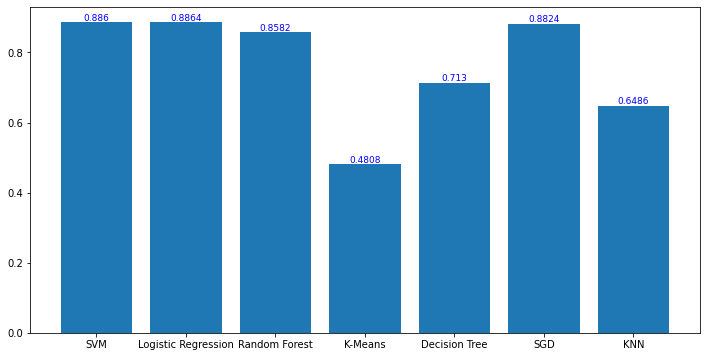

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(models, acc)

for i, v in enumerate(models):
    plt.text(v, acc[i], acc[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='blue',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')
plt.show()